# Lecture 9: Understanding Experimental Data 

Description: Prof. Grimson talks about how to model experimental data in a way that gives a sense of the underlying mechanism and to predict behaviour in new settings.

Instructor: Eric Grimson

#### Plot some data

In [5]:
distance = [0.086, 0.1, 0.12, 0.18, 0.26, 0.28]
mass = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35]

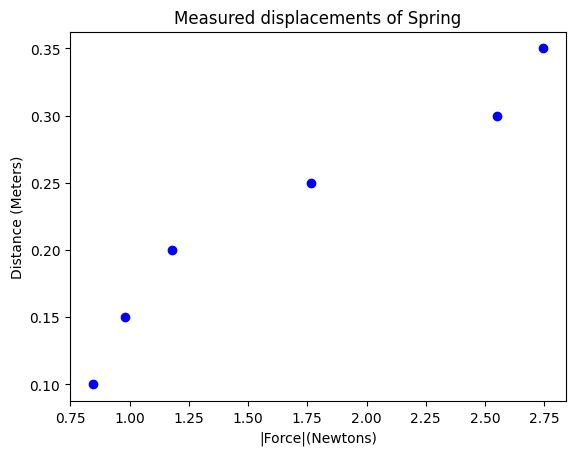

In [6]:
from lecture_code import plot_data

plot_data(dist=distance, mass=mass)

*Perpendicular distance:*

it is the closest distance from line to a point.

### To measuring distance we will choose Y value because:

we want to predict dependent Y value for given independent X value, and vertical distance measures error in that prediction.

To do that I need an objective function:
### Least Squares Objective function:

Sigma(observed[i] - predicted[i])^2

power to will ignore sign of x value. +- 

Polynomials with one Variable(X):

Line: ax+b

Parabola: ax^2 + bx + c

## PolyFit for calculating linear regression:


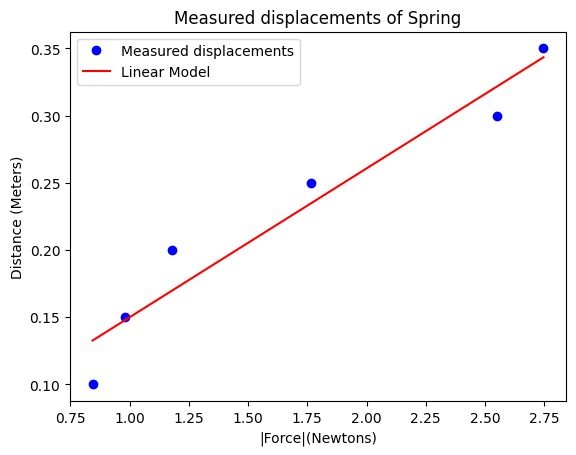

In [7]:
from lecture_code import fit_data

fit_data(dist=distance, mass=mass)

In [8]:
distance = [0.1,  0.15, 0.2,  0.25,0.4, 0.60, 0.65, 0.8, 0.9]
mass =     [0.86, 0.75, 0.55, 0.35, 0.1, 0.32, 0.48, 0.7, 0.8] 

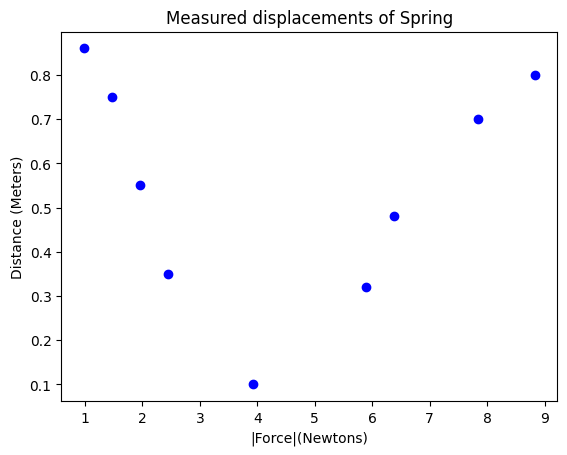

In [9]:
plot_data(dist=distance, mass=mass)

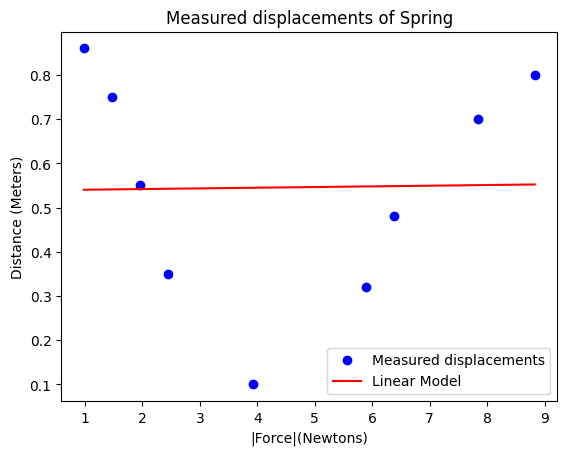

In [10]:
fit_data(dist=distance, mass=mass, model_label="Linear Model")

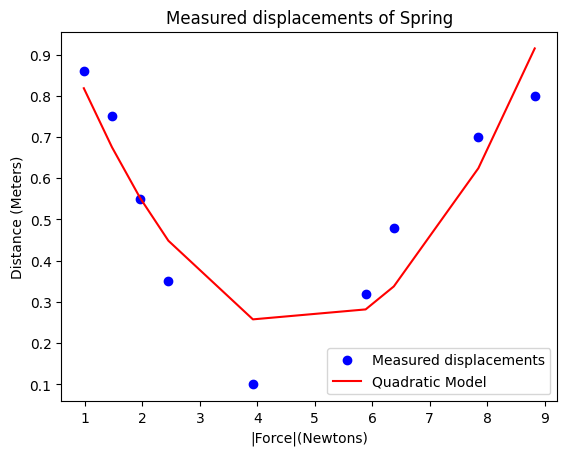

In [11]:
fit_data(dist=distance, mass=mass, degree=2, model_label="Quadratic Model")

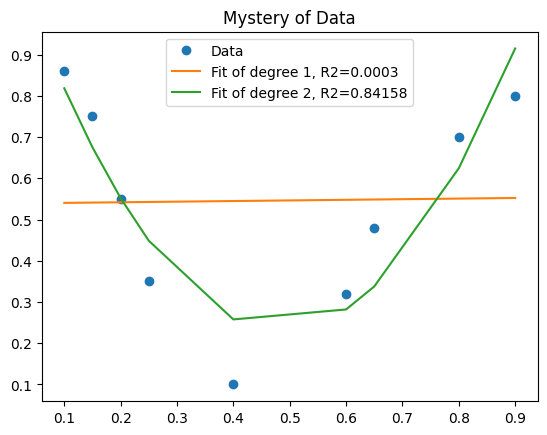

In [13]:
from lecture_code import gen_fits, test_fits
degrees = (1, 2)
models = gen_fits(x_vals=distance, y_vals=mass, degrees=degrees)
test_fits(models, degrees=degrees, x_vals=distance, y_vals=mass, title='Mystery of Data')

/tmp/ipykernel_7935/3860991011.py:2: RankWarning: Polyfit may be poorly conditioned
  models = gen_fits(x_vals=distance, y_vals=mass, degrees=degrees)


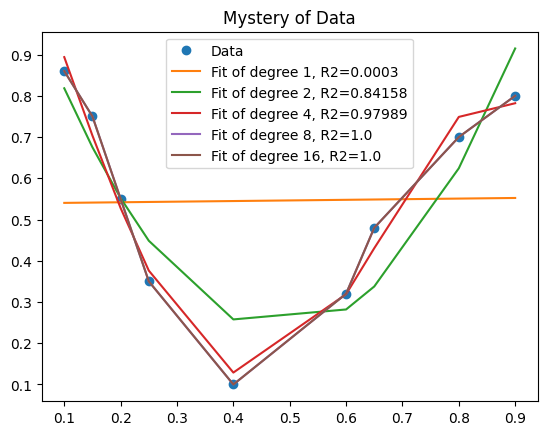

In [5]:
degrees = (1, 2, 4, 8, 16)
models = gen_fits(x_vals=distance, y_vals=mass, degrees=degrees)
test_fits(models, degrees=degrees, x_vals=distance, y_vals=mass, title='Mystery of Data')

It seems that degree 8 or 16 is the perfect for this model. But why we can not use them?

- 1- It will probably will not work for feature behavior of the data.
- 2- give me possbility to predict new values.

In [20]:
from lecture_code import gen_noisy_parabolic_data
x_vals = range(-10, 11, 1)
a, b, c = 3, 0, 0
gen_noisy_parabolic_data(a, b, c, x_vals, 'lecture_data1.txt')
x_vals = range(-10, 11, 1)
a, b, c = 3, 2, -4
gen_noisy_parabolic_data(a, b, c, x_vals, 'lecture_data2.txt')

In [17]:
from lecture_code import get_data

x1, y1 = get_data('lecture_data1.txt')
x2, y2 = get_data('lecture_data2.txt')


Train models

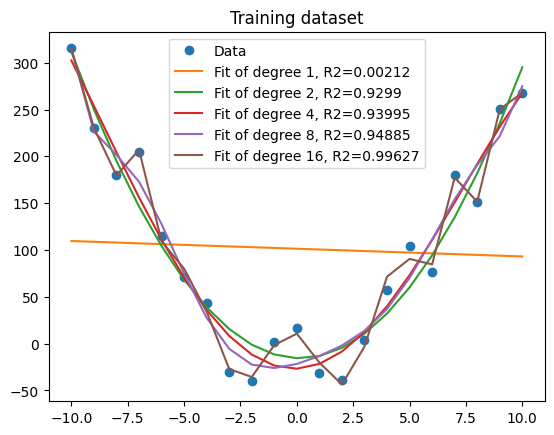

In [21]:
degrees = (1, 2, 4, 8, 16)
models = gen_fits(x_vals=x1, y_vals=y1, degrees=degrees)
test_fits(models, degrees=degrees, x_vals=x1, y_vals=y1, title='Training dataset')

Test Model on test set

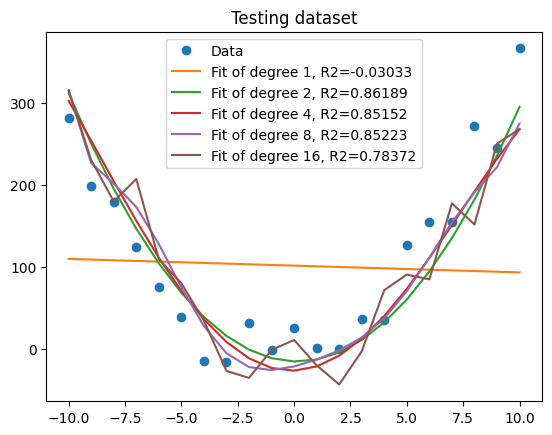

In [22]:
test_fits(models, degrees=degrees, x_vals=x2, y_vals=y2, title='Testing dataset')

So it says that we have overfitting here. We learn very well but we can not predict new data very well.


We should find a balance between training error and testing error.

### How to do it?

- 1- start with low order model and learn it then test it.
- 2- increase order model and reach a desire value in training and test data error.


### First solution: Cross-validation
Let D be the orginal dataset

``` test_results = []
for i in range(len(D)):
    training = D[:].pop(i)
    model = build_model(training)
    test_results.append(test(model, D[i]))

Average test_results

### Second solution: k fold idea

Divide dataset up to into k equal sized chunks leave one of them out and use the rest to build a model and use that model to predict that data.
For other chunks as well.


### Third solution: Repeated random sampling

```
Let D be the orginal dataset
    n be the number of random samples usually n between 20% to 50%
    k be number of trails

test_results = []
for i in range(k)
    randomly select n elements for testset and keep rest for training
    model = build_model(training)
    test_results.append(test(model, testset))

Average test_results